### Bonus: Business-Oriented Questions

16. Which types of products generate **the best customer satisfaction** (high ratings and high discounts)?
17. How can the company **optimize discount levels** to increase sales and ratings?
18. Are there specific **categories** where discounts have **no effect** on customer satisfaction?

---

## what we are going to answer in that section

In [41]:
import ast 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns
import statsmodels.api as sm

# Set the path to the file you'd like to load
file_path = 'M:/3_datasets/amazon_data.csv'

# Load the latest version
df = pd.read_csv(file_path)

# clean 
df['actual_price'] = (df['actual_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False))
df['discounted_price'] = (df['discounted_price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False))
df['discount_percentage'] = (df['discount_percentage'].str.replace('%', '', regex=False).str.replace(',', '', regex=False))
df['rating_count'] = (df['rating_count'].str.replace(',', '', regex=False))
df['rating'] = (df['rating'].str.replace('|', '0', regex=False))


df['actual_price']= df['actual_price'].astype(float)
df['discounted_price']= df['discounted_price'].astype(float)
df['discount_percentage']= df['discount_percentage'].astype(float)
df['rating_count']= df['rating_count'].astype(float)
df['rating']= df['rating'].astype(float)

# turn discount_percentage to float percentage
df['discount_percentage']= df['discount_percentage'].apply(lambda x: x/100)

# make the discounted_price more accurate
df['discounted_price'] = (df['actual_price'] * (1 - df['discount_percentage']))

In [42]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,395.64,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,198.93,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,189.90,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,328.53,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,155.61,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [43]:
df['category_clean']= df['category'].apply(lambda x: x.split('|')[-1]).copy()

In [44]:
# persentage analysis

discount_percentages= df['discount_percentage'].to_list()

percentages= []

for percentage in discount_percentages:
    if percentage >= 0.75:
        percentages.append('high')

    elif 0.75 > percentage >= 0.25:
        percentages.append('mid')
    
    else:
        percentages.append('low')

percentages

['mid',
 'mid',
 'high',
 'mid',
 'mid',
 'high',
 'mid',
 'low',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'low',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'low',
 'high',
 'high',
 'mid',
 'high',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'high',
 'mid',
 'high',
 'mid',
 'high',
 'mid',
 'mid',
 'high',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'high',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'high',
 'mid',
 'mid',
 'mid',
 'high',
 'mid',
 'mid',
 'low',
 'mid',
 'high',
 'mid',
 'low',
 'mid',
 'mid',
 'mid',
 'mid',
 'high',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'high',
 'mid',
 'mid',
 'mid',
 'mid',
 'high',
 'mid',
 'mid',
 'mid',
 'high',
 'high',
 'low',
 'mid',
 'mid'

In [45]:
# Ratings analysis

Ratings= df['rating'].to_list()

ratings= []

for Rating in Ratings:
    if Rating >= 4.5:
        ratings.append('high')
    
    elif 4.5 > Rating >= 3.5:
        ratings.append('mid')
    
    else:
        ratings.append('low')

ratings

['mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'high',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'high',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'high',
 'mid',
 'mid',
 'mid',
 'mid',
 'low',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'high',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'low',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'high',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'high',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'high',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 'mid',
 

In [46]:
df_percentages = pd.DataFrame(percentages, columns=['percentages_rate'])

df_ratings = pd.DataFrame(ratings, columns=['ratings_rate'])



### note: 

pd.concat([df_percentages, df_ratings], axis=1)
means:

“Combine these two DataFrames side by side so each percentage aligns with its rating on the same row.”

In [47]:
df_concat= pd.concat([df_percentages, df_ratings], axis=1)
df_concat

,percentages_rate,ratings_rate
0,mid,mid
1,mid,mid
2,high,mid
3,mid,mid
4,mid,mid
...,...,...
1460,mid,mid
1461,mid,mid
1462,mid,mid
1463,mid,mid


In [48]:
def get_insight(discount, rating):
    if discount == 'high' and rating == 'high':
        return " Very satisfying and price-effective"
    elif discount == 'high' and rating == 'mid':
        return "Discount attracts customers but satisfaction is average"
    elif discount == 'high' and rating == 'low':
        return "Discount doesn’t improve satisfaction"
    elif discount == 'mid' and rating == 'high':
        return "Good perceived value; balanced performance"
    elif discount == 'mid' and rating == 'mid':
        return "Average offer — moderate satisfaction and price"
    elif discount == 'mid' and rating == 'low':
        return "Product quality may be weak despite fair pricing"
    elif discount == 'low' and rating == 'high':
        return "People like it regardless of price; strong intrinsic value"
    elif discount == 'low' and rating == 'mid':
        return "Reasonably liked even without discounts"
    else:  # low & low
        return "Weak in both — neither price nor satisfaction attracts buyers"

# Apply it to every row
df_concat['insight'] = df_concat.apply(lambda row: get_insight(row['percentages_rate'], row['ratings_rate']), axis=1)


In [49]:
df_full = pd.concat([df, df_concat], axis=1)
df_full

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,category_clean,percentages_rate,ratings_rate,insight
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,395.64,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,USBCables,mid,mid,Average offer — moderate satisfaction and price
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,198.93,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,USBCables,mid,mid,Average offer — moderate satisfaction and price
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,189.90,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,USBCables,high,mid,Discount attracts customers but satisfaction i...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,328.53,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,USBCables,mid,mid,Average offer — moderate satisfaction and price
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,155.61,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,USBCables,mid,mid,Average offer — moderate satisfaction and price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,376.79,919.0,0.59,4.0,1090.0,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,WaterPurifierAc

In [ ]:
df_insight= df_full[['category_clean','percentages_rate','ratings_rate','insight']]
df_insight_sorted= df_insight.sort_values(by='category_clean').reset_index().drop(columns='index')
df_insight_sorted

,category_clean,percentages_rate,ratings_rate,insight
0,3DGlasses,low,mid,Reasonably liked even without discounts
1,AVReceivers&Amplifiers,mid,mid,Average offer — moderate satisfaction and price
2,Adapters,high,mid,Discount attracts customers but satisfaction i...
3,Adapters,mid,mid,Average offer — moderate satisfaction and price
4,Adapters,high,mid,Discount attracts customers but satisfaction i...
...,...,...,...,...
1460,WirelessUSBAdapters,mid,mid,Average offer — moderate satisfaction and price
1461,WirelessUSBAdapters,mid,mid,Average offer — moderate satisfaction and price
1462,WirelessUSBAdapters,mid,mid,Average offer — moderate satisfaction and price
1463,WoodenPencils,low,mid,Reasonably liked even without discounts


In [81]:
df_insight_sorted['insight'].value_counts()


insight
Average offer — moderate satisfaction and price                  955
Reasonably liked even without discounts                          206
Discount attracts customers but satisfaction is average          157
Good perceived value; balanced performance                        67
Product quality may be weak despite fair pricing                  30
People like it regardless of price; strong intrinsic value        25
 Very satisfying and price-effective                              12
Discount doesn’t improve satisfaction                             10
Weak in both — neither price nor satisfaction attracts buyers      3
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='category_clean'>

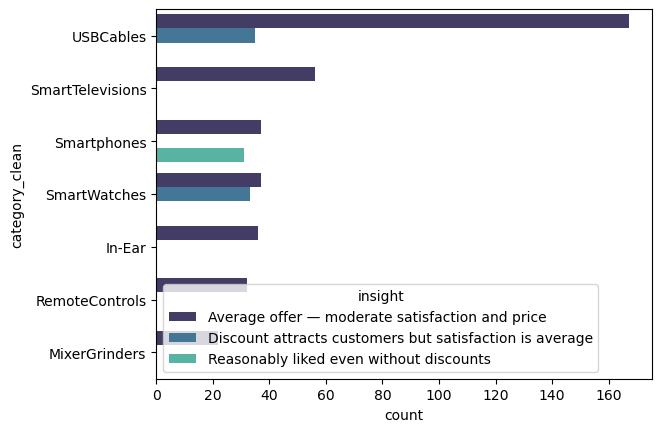

In [73]:
sns.barplot(data=df_final, x= 'count', y='category_clean', hue='insight', palette='mako')